# Preface
In today's blog, we will be classifying the [Iris dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) once again. This time we will be using [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score). It is a linear model, just like Linear Regression, used for classification. I was curious on effective using this linear model vs the KNN model used in my last blogpost. With the convenience of the Iris dataset through sklearn, I figured I'd give it a go.

I will touch more on Logistic Regression specifically further into the post.

### Tools Used
* [python3](https://www.python.org/download/releases/3.0/)
* [numpy](http://www.numpy.org/)
* [sklearn](http://scikit-learn.org/stable/)

# Let's Begin

### Imports
We'll just be importing np for any sort of linear algebra that may arise.
We will also be using sklearn throughout, only importing what we need.

In [1]:
import numpy as np

### Load the Data
We will be using the built-in iris dataset from sklearn.

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

### Split the Data
Splitting the data into training and testing sets.

In [3]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

### Fitting the Logistic Regression Classifier
We will be using the Logistic Regression classifier from sklearn.

Even though having the word Regression slapped onto Logistic Regression may make it confusing, it is actually used for classification. It uses the same linear equation `w[0]*x[0]+b` as Linear Regression, given that the *w* and *b* are evaluated differently. Instead of using this linear model to map out a trend of continuous values, it is used to draw a *decision boundary* between two classes. It uses `w[0]*x[0]+b > 0`. This meaning that that positive weighted sum values are part of the *positive* class, and any negative weighted sum values are in the *negative* class(other).

In case you are wondering how a linear classifier handles multiple classes, they use this sort of work around called *one-vs-rest*. This involves running a linear classifier for each class, where it is comparing whether it IS the chosen class or NOT. You then average them altogether to make a single model.

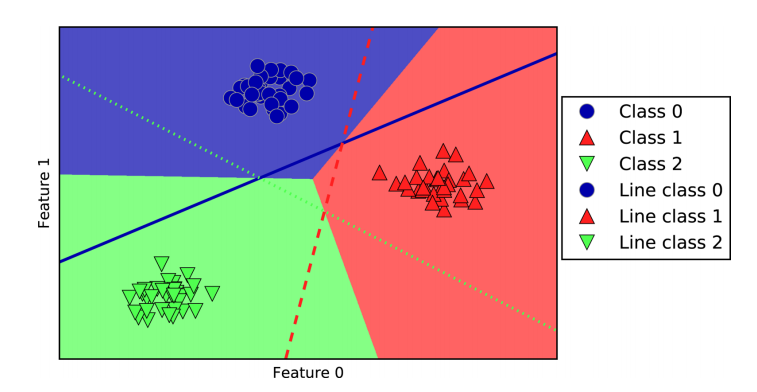

In [4]:
# Prepare the classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [5]:
# Fit the model
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluate the Model
Now let's evaluate the accuracy of our model on the training and testing data.

In [6]:
# Evaluate the model
print("Training scores: {:.2f}".format(logreg.score(X_train, Y_train)))
print("Test scores: {:.2f}".format(logreg.score(X_test,Y_test)))

Training scores: 0.95
Test scores: 0.87


Not bad! But 87% is a B, and we want an A!

The training is so good that I worry that there may be overfitting.
Since this model uses L2 regularization, let's adjust the C parameter to loosen it up a bit.
The C parameter is the inverse of regularization strength.
A lower C value means the weights/coefficients will be closer to 0, basically visualize a lower C value giving a weaker attraction to a data point, thus making the model more generalized and less fitted to the training data.

In [7]:
logreg = LogisticRegression(C = .01).fit(X_train, Y_train)

# Evaluate the model
print("Training scores: {:.2f}".format(logreg.score(X_train, Y_train)))
print("Test scores: {:.2f}".format(logreg.score(X_test,Y_test)))

Training scores: 0.70
Test scores: 0.58


Wow, that was the opposite of what I had expected.

Maybe it wasn't overfit with this data. Lets try tightening the model by raising the C param instead.

In [8]:
logreg = LogisticRegression(C = 2).fit(X_train, Y_train)

# Evaluate the model
print("Training scores: {:.2f}".format(logreg.score(X_train, Y_train)))
print("Test scores: {:.2f}".format(logreg.score(X_test,Y_test)))

Training scores: 0.96
Test scores: 0.92


Now it's looking better! Lets see if we can squeeze any more out of it!


I kept pushing the C value up and up until the test scores dropped.
I got all the way up to six 9's(999999) before the test scores went down.

In [9]:
logreg = LogisticRegression(C = 99999).fit(X_train, Y_train)

# Evaluate the model
print("Training scores: {:.2f}".format(logreg.score(X_train, Y_train)))
print("Test scores: {:.2f}".format(logreg.score(X_test,Y_test)))

Training scores: 1.00
Test scores: 0.97


### Conclusion
The 100% trained data score giving the testing its best score might be due to the specific test data not being very disimilar from the training data.
Or it could just be that our training data has created perfect seperations between the classes.

Either way, we managed to get 97% accuracy on our testing data using Logistic Regression. Which is EXACTLY what we got on the KNN classifier. The main difference being I had to tune the regularization parameter for Logistic Regresion WAY up to get it there, while KNN had it at 97% out of the box.

This is most likely due to the fact the [Iris dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) is rather small with only 150 samples total. This is where KNN shines. Linear models are decent for sparse data as well, but they thrive on high-dimensional data and/or very large datasets.

As much as I'd love to have given some visual representation of the model, matplotlib is a skill all in itself.
I may end up doing a blog post on matplotlib at some point.